# Bayesian Linear Regression Using Mapped Feature Space
The data given is as shown below consisting of 10 training examples. There are k models examined in the given problem. For each of the model $M_k$, the input space is transformed into features $(1, x, x^2 ... x^k)$. For every model $M_k$, the model is assumed to be a probabilistic linear regession with likelihood $\mathcal{N}(y|w,\beta^{-1}I_{k+1})$, where $w \in \mathbb{R}^{k+1}$ and $\beta$ is known i.e. 4. Also, the prior is assumed to be Gaussian i.e. $\mathcal{N}(w|0,I)$. Although the model is linear in nature, but since the mapped space is a transformation, the model actually behaves as a non-linear one. In this problem statement, we experiment with k=1,2,3,4.

In [7]:
#Author: 20111060
#Data for training the model
x = [-2.23,-1.30,-0.42,0.30,0.33,0.52,0.87,1.80,2.74,3.62]
y = [1.01,0.69,-0.66,-1.34,-1.75,-0.98,0.25,1.57,1.65,1.51]
beta_v = 4
N = len(x)

In [8]:
#Preparing pow(x,i) i=0,1,2,3,4 for further use
xdata_k = []

for xpoint in x:
    temp = []
    for k in range(0,5):
        temp.append(pow(xpoint,k))
    xdata_k.append(temp)

#print(xdata_k)

## Posterior of w
$p(w | y, X, \beta) = p(y|w,X,\beta)*p(w|0,I) = \mathcal{N}(y|Xw,\beta^{-1}I_N) \mathcal{N}(w|0,I_{k+1})$

$\therefore p(w | y, X, \beta) = \mathcal{N}(w|(X^TX + \frac{1}{\beta}I_{k+1})^{-1} X^T y, (\beta X^TX + I_{k+1})^{-1}) = \mathcal{N}(w|\mu_N, \Sigma_N)$

, where $\Sigma_N = (\beta X^TX + I_{k+1})^{-1}$ and $\mu_N = (X^TX + \frac{1}{\beta}I_{k+1})^{-1} X^T y = \beta \Sigma_N X^T y$

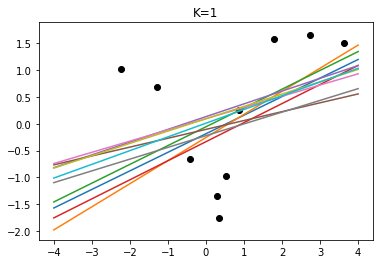

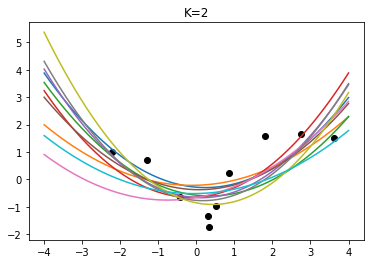

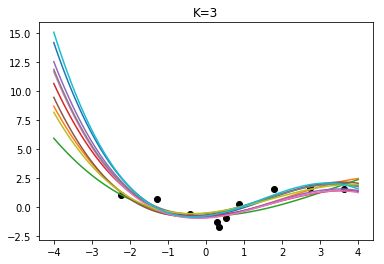

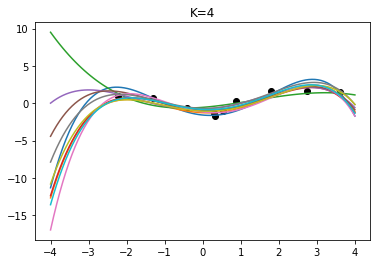

In [9]:
import numpy as np
import matplotlib.pyplot as plt

#For storing mean and covariance matrix of weight posterior for different k
weight_mean_k = {}
weight_variance_k = {}

Ymatrix = np.array(y)

for k in range(1,5):
    curr_mean = 0
    Xmatrix = np.zeros(shape=(len(x),k+1))
    for i in range(len(x)):
        Xmatrix[i] = xdata_k[i][0:k+1]
    Xmatrix_T = np.transpose(Xmatrix)
    #print(Xmatrix)
    #print(Xmatrix_T)
    XmatrixT_X = np.matmul(Xmatrix_T, Xmatrix)
    #print(XmatrixT_X)
    I_D = np.identity(k+1)
    #print(I_D)
    
    #cov = (beta*X^T*X + I)^{-1}
    cov_mat = np.linalg.inv(beta_v*XmatrixT_X + I_D)
    #print(cov_mat)
    
    #mean = (X^T*X + (1/beta)I)^{-1} X^T Y = beta*cov X^T y
    mean_mat = np.matmul(np.matmul(beta_v*cov_mat,Xmatrix_T),Ymatrix)
    #print(mean_mat)
    
    weight_mean_k[k] = mean_mat
    weight_variance_k[k] = cov_mat
    
for k in range(1,5):
    '''
    print('For k = ', k, ', the posterior is Gaussian distribution with:')
    print('Mean weight = ', weight_mean_k[k])
    print('Covariance matrix of weight: \n', weight_variance_k[k])
    '''
    
    random_weights = np.random.multivariate_normal(weight_mean_k[k],weight_variance_k[k],10)
    #print(random_weights)
    
    xvals = np.linspace(-4,4,100)
    #print(xvals)
    
    yvals = []
    
    for i in range(0,N):
        ys = []
        for xv in xvals:
            yv = 0
            for j in range(k+1):
                yv = yv + random_weights[i][j]*(pow(xv,j))
            ys.append(yv)
        yvals.append(ys)
        
    #print(yvals)
    
    plt.title('K=' + str(k))
    for i in range(N):
        plt.plot(xvals,yvals[i])
    plt.scatter(x,y,color='black')
    plt.show()
    


# Predictive Posterior Distribution
The predictive posterior distribution for a linear regression is also a Gaussian and can be expressed as below.
$p(y_* | x_*, X, w, \beta) = \mathcal{N}(y_* | \mu_n^T x_*, \beta^{-1} + x_*^T \Sigma_N x_*)$

, where $\Sigma_N = (\beta X^TX + I_{k+1})^{-1}$ and $\mu_N = (X^TX + \frac{1}{\beta}I_{k+1})^{-1} X^T y = \beta \Sigma_N X^T y$, same as that shown in posterior. The above equation can also be compactly written as:
$p(y_* | x_*, X, w, \beta) = \mathcal{N}(y_* | \mu_n^T x_*, \sigma_N^2 (x_*))$, where $\sigma_N^2(x_*) = \beta^{-1} + x_*^T \Sigma_N x_*$ is the variance and $\sigma_N(x_*)$ is the standard deviation of the model.

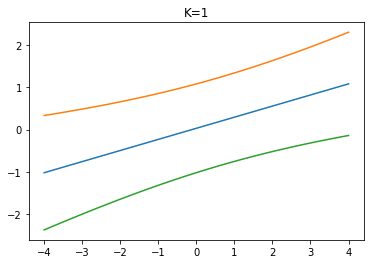

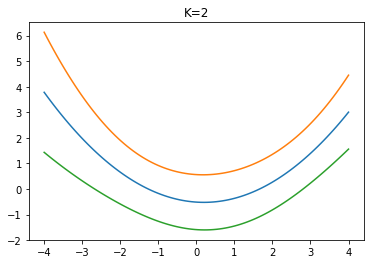

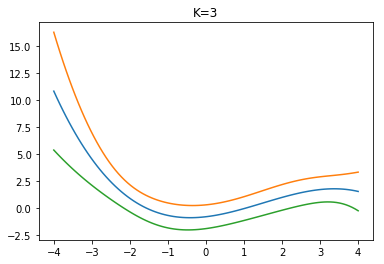

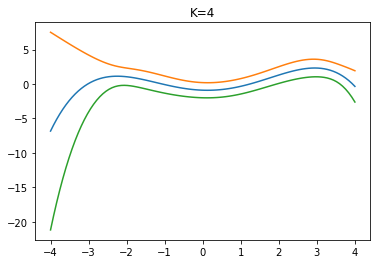

In [10]:
for k in range(1,5):
    mwk = weight_mean_k[k]
    swk = weight_variance_k[k]
    
    #100 points between -4 and 4
    x_star = np.linspace(-4,4,100)
    mean_pred = np.zeros(len(x_star))
    for ind in range(len(x_star)):
        xp = x_star[ind]
        yp = 0
        for i in range(0,k+1):
            yp = yp + mwk[i]*pow(xp,i)
        mean_pred[ind] = yp
        
    stddev_pred = np.zeros(len(x_star))
    for ind in range(len(x_star)):
        xp = x_star[ind]
        yp = 1/beta_v
        x_st = []
        for i in range(0,k+1):
            x_st.append(pow(xp,i))
        
        x_stt = np.reshape(x_st,(1,k+1))
        prod_vmv = np.matmul(np.matmul(x_stt,swk),x_st)
        yp = yp + prod_vmv[0]
        stddev_pred[ind] = yp
    
    #Standard Deviation is square root of variance
    stddev_pred = np.sqrt(stddev_pred)
        
    #print(stddev_pred)
    pred_2 = mean_pred + 2*stddev_pred
    pred_3 = mean_pred - 2*stddev_pred
    plt.title('K=' + str(k))
    plt.plot(x_star,mean_pred)
    plt.plot(x_star,pred_2)
    plt.plot(x_star,pred_3)
    plt.show()

## Log Marginal Likelihood
$log p(y | \phi(X), \beta) = log \int \mathcal{N}(y | Xw, \beta^{-1} I_N) \mathcal{N}(w | 0, I_{k+1}) dw$

$= log \mathcal{N}(y | 0, \beta^{-1} I_N + X X^T) $

$= - \frac{N}{2} log(2 \pi) - \frac{1}{2} log || (\beta^{-1} I_N + X X^T) || - \frac{1}{2} y^T (\beta^{-1} I_N + X X^T)^{-1} y$

In [11]:
model_max = float('-inf')
best_model = -1

for k in range(1,5):
    Xmatrix = np.zeros(shape=(len(x),k+1))
    for i in range(len(x)):
        Xmatrix[i] = xdata_k[i][0:k+1]
    Ymatrix = np.array(y)
    cov_mat = 1/beta_v * np.identity(N) + np.matmul(Xmatrix,np.transpose(Xmatrix))
    #print(cov_mat)
    
    #y^T using reshape
    Ymat_T = np.reshape(Ymatrix,(1,N))
    # y^T cov^-1 y
    prod = np.matmul(np.matmul(Ymat_T,np.linalg.inv(cov_mat)),Ymatrix)
    #print(prod)
    log_lik = -(N/2)*np.log(2 * np.pi) - (1/2)* np.log(np.linalg.det(cov_mat)) - (1/2) * prod[0]
    print('Log Marginal likelihood for model with k=',k ,': ', log_lik)
    if log_lik>model_max:
        model_max = log_lik
        best_model = k
        
print('The Bayesian Inference model that best explains data is the model with k=', best_model)

Log Marginal likelihood for model with k= 1 :  -32.35201528044522
Log Marginal likelihood for model with k= 2 :  -22.77215317878231
Log Marginal likelihood for model with k= 3 :  -22.07907064224099
Log Marginal likelihood for model with k= 4 :  -22.386776180354264
The Bayesian Inference model that best explains data is the model with k= 3


By looking at the above marginal log likelihoods, the model with k=3 seems to explain the data best in this case as it shows maximum marginal log likelihood.

## Log Likelihood using the MAP estimate
The expression for weight estimated using MAP method is:
$w_{MAP} = (X^T X + \frac{1}{\beta} I_D)^{-1} X^T y$

The log likelihood using this estimate is:

$log p(y | X, w_{MAP} ,\beta) = log \mathcal{N}(y | X w_{MAP}, \beta^{-1} I_N)$

$= - \frac{N}{2} log(2 \pi) - \frac{1}{2} log || (\beta^{-1} I_N) || - \frac{1}{2} (y - X w_{MAP})^T (\beta^{-1} I_N)^{-1} (y- X w_{MAP})$

$= - \frac{N}{2} log(2 \pi) + \frac{N}{2} log \beta - \frac{\beta}{2} (y - X w_{MAP})^T(y- X w_{MAP})$

In [12]:
model_max_2 = float('-inf')
best_model_2 = -1

for k in range(1,5):
    wmap = weight_mean_k[k]
    Xmatrix = np.zeros(shape=(len(x),k+1))
    for i in range(len(x)):
        Xmatrix[i] = xdata_k[i][0:k+1]
    Ymatrix = np.array(y)
    Diff = (Ymatrix - np.matmul(Xmatrix,wmap))
    Diff_T = np.reshape(Diff,(1,10))
    prod = np.matmul(Diff_T, Diff)
    #print(prod)
    log_lik = -(N/2)*np.log(2 * np.pi) + (N/2)* np.log(beta_v) - (beta_v/2) * prod[0]
    print('Log likelihood for model with k=',k ,': ', log_lik)
    if log_lik>model_max_2:
        model_max_2 = log_lik
        best_model_2 = k
        
print('The MAP estimate model that best explains data is the model with k=', best_model_2)

Log likelihood for model with k= 1 :  -28.094004379075546
Log likelihood for model with k= 2 :  -15.360663659052218
Log likelihood for model with k= 3 :  -10.935846883615742
Log likelihood for model with k= 4 :  -7.225291259028565
The MAP estimate model that best explains data is the model with k= 4


In the MAP estimate case however, the model that best explains/fits the data is model with k=4, which is different from the case where we obtained best performance from model with k=3.

Among the two models with highest log marginal likelihood and highest log likelihood, the best model should be considered using highest log marginal likelihood. This is because in this case, since the data provided is less, it would be improper to report based on just one instance of the parameters and using a model based on inference over the entire parameter space is more beneficial as in this case, they also report the variance/certainty of the prediction based on the input considered since the variance is dependent on input itself. In such cases, a single data may overfit to provide good training performance, but overall, it would be good to average over all the models, in order to take into account their prediction values and uncertainty in their predictions as well. Hence, the best model should be considered as the one with k=3.

## Where to include additional training example?

As is evident from plot of the model with k=3 and the input training examples, there are no input/s in the range \[-4,-3\]. Due to this the training examples should be added in the region \[-4,-3\] so that the posterior can also be estimated based on that example due to which the appropriate parameters i.e. weights can be given more/less importance to fit the data. This in turn, will also enable the model to make better and more certain predictions (with less variance) in that range.